In [1]:
import pandas as pd
import numpy as np
import pickle

Import standard dataset

In [2]:
file = 'data.pkl'

# Load pre-configured data
f = open(file, "rb")
scenario_data = pickle.load(f)

# print header
list(scenario_data.keys())
baseloads = scenario_data["baseloaddata"]
print(baseloads.shape)
n_houses, n_samples = baseloads.shape

(100, 34944)


Import day-ahead prices dataset

In [3]:
# dataset_2020 = pd.read_csv('Day-ahead Prices_2020_1h.csv')
dataset_2020 = pd.read_csv('Day-ahead Prices_2020_1h.csv', usecols=['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]'])

# print the first 5 rows of the dataframe.
print(dataset_2020.shape)
dataset_2020.head()

(8761, 2)


,MTU (CET/CEST),Day-ahead Price [EUR/MWh]
0,01.01.2020 00:00 - 01.01.2020 01:00,41.88
1,01.01.2020 01:00 - 01.01.2020 02:00,38.60
2,01.01.2020 02:00 - 01.01.2020 03:00,36.55
3,01.01.2020 03:00 - 01.01.2020 04:00,32.32
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85


Resample to 15 minute intervals

In [4]:
# convert the date column to datetime
dates = dataset_2020['MTU (CET/CEST)']
dates = dates.str.slice(0, 16)
dates = pd.to_datetime(dates, format='%d.%m.%Y %H:%M')

# write back to dataframe
dataset_2020['MTU (CET/CEST)'] = dates
dataset_2020.head()

,MTU (CET/CEST),Day-ahead Price [EUR/MWh]
0,2020-01-01 00:00:00,41.88
1,2020-01-01 01:00:00,38.60
2,2020-01-01 02:00:00,36.55
3,2020-01-01 03:00:00,32.32
4,2020-01-01 04:00:00,30.85


In [5]:
dataset_2020 = dataset_2020.set_index('MTU (CET/CEST)')
dup_index = dataset_2020.index.duplicated()
print(dup_index.sum())
# print the duplicates
print(dataset_2020[dup_index])

# remove duplicates
dataset_2020 = dataset_2020[~dup_index]

1
                     Day-ahead Price [EUR/MWh]
MTU (CET/CEST)                                
2020-10-25 02:00:00                       0.09


In [6]:
# interpolate
dataset_2020 = dataset_2020.resample('15min').interpolate(method='linear')

# cut to n_samples
dataset_2020 = dataset_2020.iloc[:n_samples]

In [7]:
print(dataset_2020.shape)
dataset_2020.head()

(34944, 1)


,Day-ahead Price [EUR/MWh]
MTU (CET/CEST),
2020-01-01 00:00:00,41.88
2020-01-01 00:15:00,41.06
2020-01-01 00:30:00,40.24
2020-01-01 00:45:00,39.42
2020-01-01 01:00:00,38.60


Store data as pickle

In [8]:
# pickled = open('day_ahead_2020.pkl', 'wb')
# pickle.dump(dataset_2020, pickled)
# pickled.close()

Make plot

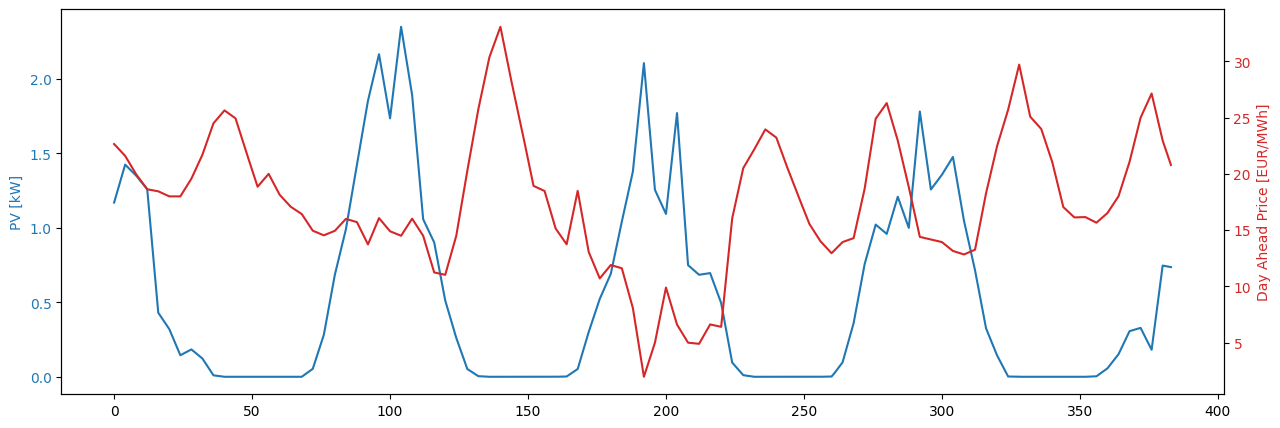

In [29]:
import matplotlib.pyplot as plt

pv_data = scenario_data["irrdata"]

# plot pv data against day ahead prices
offset = 13000
idx_range = [offset, offset + 4*96]
day_ahead = dataset_2020['Day-ahead Price [EUR/MWh]'].values[idx_range[0]:idx_range[1]]
pv = pv_data[0, idx_range[0]:idx_range[1]]

# plot figure with two axis
plt.figure(figsize=(15, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

# plot pv data
ax1.plot(-pv, color='tab:blue')
ax1.set_ylabel('PV [kW]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# plot day ahead prices
ax2.plot(day_ahead, color='tab:red')
ax2.set_ylabel('Day Ahead Price [EUR/MWh]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.show()